In [10]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("C:/Users/rakag/Documents/Datasets/Mall_Customers.csv", index_col=0)
data.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [46]:
data.drop(["Genre", "Age"], axis=1, inplace=True)
data = data.sample(frac=1) # Shuffle the data
data.head(10)

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
130,71,75
196,120,79
84,54,44
48,40,47
109,63,43
129,71,11
73,50,49
199,137,18
90,58,46


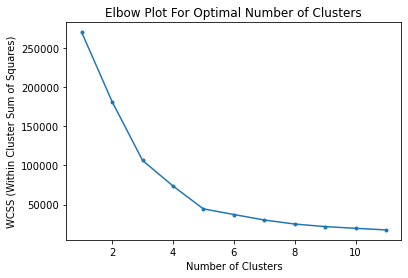

In [47]:
# Using the elbow method to find the optimal number of clusters
WCSS = [] # Within Cluster Sum of Square
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1, 12), WCSS, marker = ".")
plt.title('Elbow Plot For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

### KMeans clustering with 5 clusters

In [51]:
clustering = KMeans(n_clusters = 5)
clustering.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
print("Labels: ", np.unique(clustering.labels_))

clusterCenters = clustering.cluster_centers_
print("Cluster Centers: ")
clusterCenters

Labels:  [0 1 2 3 4]
Cluster Centers: 


array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

### Displaying Data in 5 Cluster Form

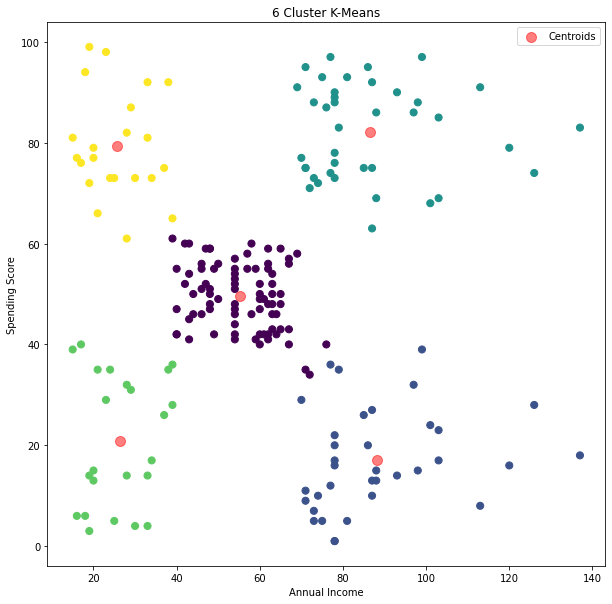

In [55]:
plt.figure(figsize=(10, 10))

plt.scatter(data["Annual Income (k$)"],
            data["Spending Score (1-100)"],
            c = clustering.labels_, s = 50, cmap = "viridis")

plt.scatter(clusterCenters[:,0], clusterCenters[:,1], 
            color="red", marker = ".", s = 400, alpha=0.5, label = "Centroids")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("6 Cluster K-Means")
plt.legend()
plt.show()